In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
ticker = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

start, end = '2020-01-01', '2023-01-01'

data = yf.download(ticker,
                   start=start,
                   end=end)['Close']

returns = data.pct_change().dropna()

[*********************100%***********************]  5 of 5 completed


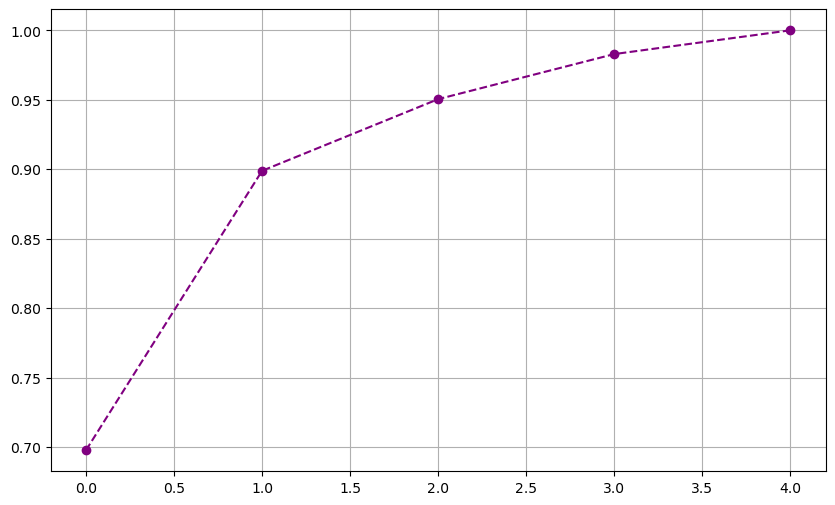

In [4]:
pca = PCA()

factors = pca.fit_transform(returns)

explain_var_ratio = pca.explained_variance_ratio_

df = pd.DataFrame(factors,
                  columns=[f"PC{i+1}" for i in range(5)],
                  index = returns.index)

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explain_var_ratio), marker='o', linestyle = '--', color='purple')
plt.grid()
plt.show()

#First component explain 70%